In [1]:
import tensorflow as tf

In [2]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm  

In [13]:
train_dir = "C:/Users/DMV4KOR/Desktop/trainingSet"

# Simple Network with no convolution layer

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28,3)), 
    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
    tf.keras.layers.Dense(15, activation=tf.nn.softmax)  
])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2352)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1204736   
_________________________________________________________________
dense_3 (Dense)              (None, 15)                7695      
Total params: 1,212,431
Trainable params: 1,212,431
Non-trainable params: 0
_________________________________________________________________


In [16]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

     
train_datagen = ImageDataGenerator(rescale=1./255,

    validation_split=0.2) 

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(28, 28),
    batch_size=20,
    shuffle = False,
    classes = ['0','1','2','3','4','5','6','7','8','9','+','-','times','(',')'],
    class_mode="sparse",
    subset='training') 

validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(28, 28),
    batch_size=20,
    shuffle = False,
    classes = ['0','1','2','3','4','5','6','7','8','9','+','-','times','(',')'],
    class_mode="sparse",
    subset='validation') 

Found 52205 images belonging to 15 classes.
Found 13046 images belonging to 15 classes.


In [18]:
train_generator.filenames[-1]

')\\img_999.jpg'

In [163]:
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              epochs=5)

Epoch 1/5
2611/2611 [==============================] - 431s 165ms/step - loss: 0.0395 - acc: 0.9878 - val_loss: 0.0767 - val_acc: 0.9803
Epoch 2/5
2611/2611 [==============================] - 414s 159ms/step - loss: 0.0331 - acc: 0.9896 - val_loss: 0.0891 - val_acc: 0.9782
Epoch 3/5
2611/2611 [==============================] - 417s 160ms/step - loss: 0.0250 - acc: 0.9919 - val_loss: 0.0937 - val_acc: 0.9798
Epoch 4/5
2611/2611 [==============================] - 430s 165ms/step - loss: 0.0267 - acc: 0.9923 - val_loss: 0.0886 - val_acc: 0.9813
Epoch 5/5
2611/2611 [==============================] - 414s 159ms/step - loss: 0.0181 - acc: 0.9945 - val_loss: 0.1028 - val_acc: 0.9800


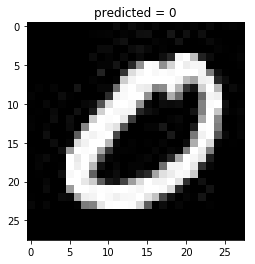

In [126]:
from tensorflow.keras.preprocessing import image
path = 'C:/Users/DMV4KOR/Desktop/trainingSet/+/img_161.jpg'
path2 = 'C:/Users/DMV4KOR/Desktop/Easy/test/4.png'
path3 = "C:/Users/DMV4KOR/Desktop/-.jpg"
path4 = 'C:/Users/DMV4KOR/Desktop/Easy/test/+2.png'
path5 = "C:/Users/DMV4KOR/Desktop/trainingSet/0/img_18044.jpg"
img=image.load_img(path5, target_size=(28, 28))

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=20)
index = np.where(classes[0]==1)[0]

c = ['0','1','2','3','4','5','6','7','8','9','+','-','times','(',')']
plt.title("predicted = "+str(c[index[0]]))
plt.imshow(img)


In [59]:
c = ['0','1','2','3','4','5','6','7','8','9','+','-','times']
print("predicted ",c[index[0]])

predicted  0


Text(0.5,1,'Training and validation loss')

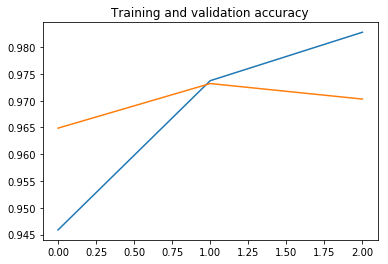

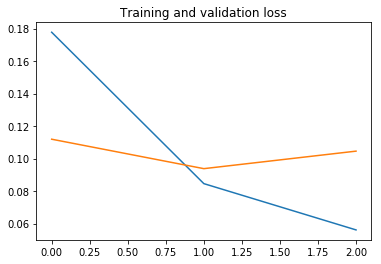

In [55]:

acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) 

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

# Dilating training images

In [ ]:
files = os.listdir("C:\\Users\\DMV4KOR\\Downloads\\extracted_images\\)")
input_path = "C:\\Users\\DMV4KOR\\Downloads\\extracted_images\\)\\"
write_path =  "C:/Users/DMV4KOR/Desktop/Output2/)/"
for i in range(0,5000):
    img = cv2.imread(input_path+files[i]) 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    retval, binary = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY_INV)
    # Taking a matrix of size 5 as the kernel 
    kernel = np.ones((3,3), np.uint8) 
    img_dilation = cv2.dilate(binary, kernel, iterations=1) 
    img_dilation =  cv2.resize(img_dilation,(28,28))
    cv2.imwrite(write_path+"img_"+str(i)+".jpg",img_dilation)

# Predictions

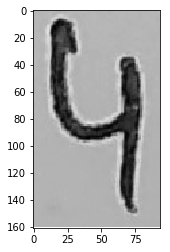

In [7]:
path2 = "C:/Users/DMV4KOR/Desktop/Easy/test/4_1.png"
img = cv2.imread(path2)

img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap="gray")


True

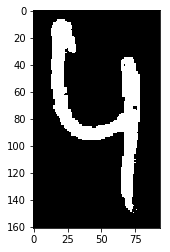

In [8]:
t, binary_image = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY_INV)
plt.imshow(binary_image, cmap="gray")
cv2.imwrite("C:/Users/DMV4KOR/Desktop/4_1.jpg",binary_image)

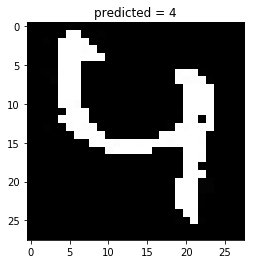

In [11]:
from tensorflow.keras.preprocessing import image

path4 = 'C:/Users/DMV4KOR/Desktop/4_1.jpg'
img=image.load_img(path4, target_size=(28, 28))

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=20)
index = np.where(classes[0]==1)[0]

c = ['0','1','2','3','4','5','6','7','8','9','+','-','times','(',')']
plt.title("predicted = "+str(c[index[0]]))
plt.imshow(img)

# Adding convolutional layers

In [29]:
# LOAD LIBRARIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#from tensorflow.keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler

In [41]:
nets = 1
model = [0] *nets
for j in range(nets):
    model[j] = Sequential()

    model[j].add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 3)))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(32, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))

    model[j].add(Conv2D(64, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(64, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))

    model[j].add(Conv2D(128, kernel_size = 4, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Flatten())
    model[j].add(Dropout(0.4))
    model[j].add(Dense(15, activation='softmax'))

    # COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
    model[j].compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [42]:
model[0].summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
batch_normalization_v1_21 (B (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_v1_22 (B (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_v1_23 (B (None, 12, 12, 32)        128       
_________________________________________________________________
dropout_9 (Dropout)          (None, 12, 12, 32)        0         
__________

In [43]:
history1 = model[0].fit_generator(train_generator,
                              validation_data=validation_generator,
                              epochs=5)

Epoch 1/5
2611/2611 [==============================] - 560s 214ms/step - loss: 0.2056 - acc: 0.9396 - val_loss: 0.0447 - val_acc: 0.9861
Epoch 2/5
2611/2611 [==============================] - 545s 209ms/step - loss: 0.0807 - acc: 0.9765 - val_loss: 0.0538 - val_acc: 0.9835
Epoch 3/5
2611/2611 [==============================] - 539s 206ms/step - loss: 0.0632 - acc: 0.9821 - val_loss: 0.0321 - val_acc: 0.9908
Epoch 4/5
2611/2611 [==============================] - 569s 218ms/step - loss: 0.0520 - acc: 0.9852 - val_loss: 0.0368 - val_acc: 0.9889
Epoch 5/5
2611/2611 [==============================] - 553s 212ms/step - loss: 0.0467 - acc: 0.9867 - val_loss: 0.0220 - val_acc: 0.9936


In [46]:
#model[0].save('C:/Users/DMV4KOR/Desktop/my_model.h5')

In [4]:
model = tf.keras.models.load_model('C:/Users/DMV4KOR/Desktop/my_model.h5')

W0910 16:14:22.071289 15608 deprecation.py:506] From C:\Users\DMV4KOR\AppData\Local\Continuum\anaconda31\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0910 16:14:22.072287 15608 deprecation.py:506] From C:\Users\DMV4KOR\AppData\Local\Continuum\anaconda31\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0910 16:14:22.073285 15608 deprecation.py:506] From C:\Users\DMV4KOR\AppData\Local\Continuum\anaconda31\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling

# Plot misclassified images

In [66]:
pred = model.predict_generator(train_generator)
predicted_class_indices=np.argmax(pred,axis=1)

In [75]:
pred[0], predicted_class_indices[0], train_generator.classes[0]

(array([9.9999094e-01, 3.3001317e-08, 7.3005606e-07, 8.9148893e-09,
        1.0078630e-07, 3.0693315e-07, 7.6675287e-06, 3.3050007e-08,
        1.6991228e-07, 2.1360597e-08, 6.5274158e-08, 4.5295203e-09,
        1.7482227e-08, 9.5913357e-09, 3.2146013e-09], dtype=float32), 0, 0)

In [68]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [69]:
filenames=train_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})

# false predictions:  259 out of 52205
actual/predicted


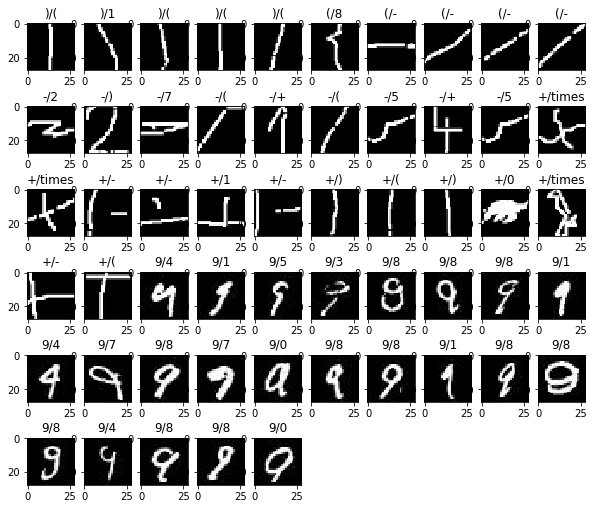

In [120]:
## show misclassified images
y_valid_pred_label = predicted_class_indices
y_valid_label = train_generator.classes
y_val_false_index = []

for i in range(y_valid_label.shape[0]):
    if y_valid_pred_label[i] != y_valid_label[i]:
        y_val_false_index.append(i)
y_val_false_index =  y_val_false_index[::-1]
print('# false predictions: ', len(y_val_false_index),'out of', len(y_valid_label))
print('actual/predicted')
path = train_dir+"/"
plt.figure(figsize=(10,15))
for j in range(0,5):
    for i in range(0,15):
        if j*10+i<len(y_val_false_index):
            plt.subplot(10,10,j*10+i+1)
            plt.title('%s/%s'%(labels[y_valid_label[y_val_false_index[j*10+i]]],
                               labels[y_valid_pred_label[y_val_false_index[j*10+i]]]))
            fname = filenames[y_val_false_index[j*10+i]]
            img=image.load_img(path+fname[0]+"/"+fname[2:], target_size=(28, 28))
            plt.imshow(img,cmap=cm.binary) 

# Adding noises

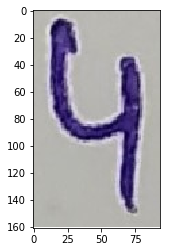

In [188]:

#from PIL import Image, ImageDraw, ImageFont
fn = "C:/Users/DMV4KOR/Desktop/Easy/test/4_1.png"
#img = PIL.Image.open(fn)
img=image.load_img(fn)

x=image.img_to_array(img)
plt.imshow(img)

In [173]:
def add_salt_pepper_noise(X_img):
    # Need to produce a copy as to not modify the original image
    x = np.array(X_img)
    X_imgs_copy = x.copy()
    row, col, _ = x.shape
    salt_vs_pepper = 0.2
    amount = 0.004
    num_salt = np.ceil(amount * x.size * salt_vs_pepper)
    num_pepper = np.ceil(amount * x.size * (1.0 - salt_vs_pepper))
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in x.shape]
    x[coords[0], coords[1], :] = 1

    # Add Pepper noise
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in x.shape]
    x[coords[0], coords[1], :] = 0
    return x

True

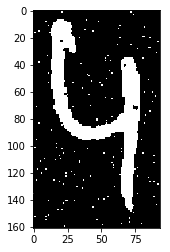

In [181]:
im = add_salt_pepper_noise(img)
plt.imshow(im)
im1 = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
plt.imshow(im1, cmap="gray")
t, binary_image = cv2.threshold(im1, 100, 255, cv2.THRESH_BINARY_INV)
plt.imshow(binary_image, cmap="gray")
cv2.imwrite("C:/Users/DMV4KOR/Desktop/4_1_g.jpg",binary_image)

In [168]:
salt_vs_pepper = 0.2
amount = 0.004
num_salt = np.ceil(amount * x.size * salt_vs_pepper)
num_pepper = np.ceil(amount * x.size * (1.0 - salt_vs_pepper))

In [169]:
coords = [np.random.randint(0, i - 1, int(num_salt)) for i in x.shape]
x[coords[0], coords[1], :] = 1

# Add Pepper noise
coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in x.shape]
x[coords[0], coords[1], :] = 0

# To Do:
    * Manually clean train dataset
    * Add augementations
    * Add noises
    * Work on shifted images
    * May need to add 'a' and 'b' to the training dataest and fine-tune

